# Synthetic Data Generators

## Random User Information with Faker

In [1]:
from faker import Faker

fake = Faker()

print(fake.name())
print(fake.address())
print(fake.url())

Cathy Smith
7919 Gallagher Drive
Christopherport, LA 09708
http://tran-walton.com/


All these methods return new items on each call, so it is easy to build an artificial CSV dataset with a code snippet like the one below:

In [2]:
import pandas as pd

df = pd.DataFrame(
    [
        {
            "name": fake.name(),
            "address": fake.address(),
            "birthday": fake.date_of_birth(),
            "email": fake.email(),
            "password": fake.password(),
        }
        for _ in range(1000)
    ]
)

df.to_csv("data/fake.csv", index=False)

In [3]:
df.sample(5)

,name,address,birthday,email,password
736,Benjamin Brown,"94384 Williams Extensions Apt. 209\nEast Kirk,...",1973-10-16,sgeorge@example.net,!1BP6zv6&w
784,Molly Jackson,"850 Burton Wells Apt. 494\nLake Amber, MT 16961",1934-02-11,staceysantiago@example.org,#G3W+6lZ59
581,Ronald Beard Jr.,"1663 Emily Manor Apt. 328\nEast Amanda, MH 94481",1966-10-22,cray@example.com,8M8BZUr$%r
989,Christy Paul,"477 James Field\nNorth Donald, IL 67598",1916-11-06,matadanielle@example.com,#8D%Im@(qA
555,Anthony Zimmerman,USNS Hughes\nFPO AE 81156,1955-02-26,wgallegos@example.com,@JtTnFZX41


## Synthetic datasets with Sklearn for ML tasks

Sklearn `datasets` module includes many functions to generate artificial datasets for various machine learning tasks. The most popular functions are `make_classification` and `make_regression`.

Both have `n_samples` and `n_features` parameters to control the number of rows and features of the resulting synthetic dataset.

In [4]:
from sklearn.datasets import make_classification, make_regression

X, y = make_classification(
    n_samples=5000, n_features=20, n_informative=15, n_classes=3, n_clusters_per_class=3
)


X, y = make_regression(n_samples=5000, n_features=20, n_informative=10)

To control the difficulty of the task, you can specify how many features are useful or redundant with `n_informative` (correlated) or `n_redundant` (linear combinations of informative features) parameters.

`make_classification` also offers much control over the classification target, namely, the number of classes, clusters per class, and class weights.

There is also the `make_blobs` function for generating clustering tasks as seen below:

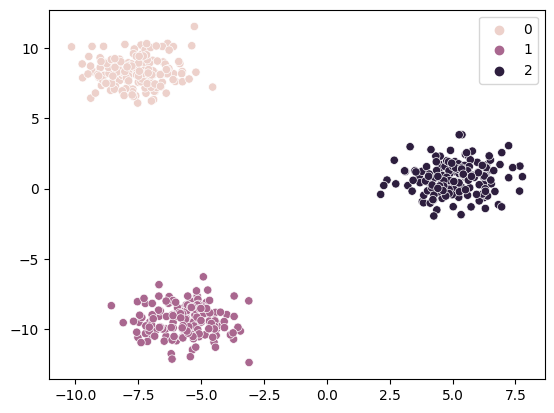

In [9]:
import seaborn as sns
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=500, n_features=2)

sns.scatterplot(x=X[:,0], y=X[:,1], hue=y);

There are other functions such as:
- make_checkerboard
- make_circles 
- make_moons
- make_s_curve

## Dataset with outliers in PyOD

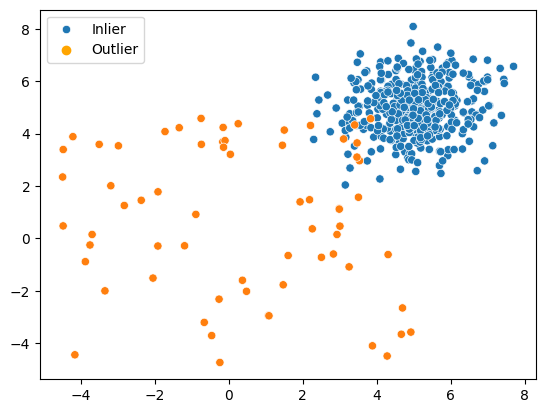

In [11]:
from pyod.utils.data import generate_data
import seaborn as sns
import matplotlib.pyplot as plt

X, y = generate_data(
    n_train=500, contamination=0.13, n_features=2, train_only=True, random_state=1
)

# Plot
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)

# Modify the damn legend
legend = plt.legend(labels=['Inlier', 'Outlier'])
legend.legendHandles[1].set_color("orange")

## Synthetic data on top of another dataset with CTGAN

When you have limited data, it is hard for machine learning models to generalize well and not overfit. In such cases, you can use Conditional General Adversarial Networks — CTGAN.

After you fit it to any dataset, CTGAN can generate synthetic highly anonymous samples from the dataset's information space. This is a great way to increase both data security and dataset size.

CTGAN is provided by the Synthetic Data Vault (SDV) project. Its Python API exposes a CTGAN class that requires the dataset to be learned and a list of its categorical columns.

In [12]:
import seaborn as sns
import pandas as pd
from ctgan import CTGAN

# Extract categorical data types
iris = sns.load_dataset("iris")
categoricals = iris.select_dtypes(exclude="number").columns.tolist()

# Fit CTGAN
ctgan = CTGAN(epochs=10)
ctgan.fit(iris, categoricals)

# Generate the data
synthetic_iris = ctgan.sample(20000)
synthetic_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.057679,4.146770,6.051770,0.185496,setosa
1,4.864473,3.506542,7.347436,1.549421,versicolor
2,5.352641,3.615926,2.842476,0.255366,versicolor
3,5.779596,3.924037,4.971573,-0.324876,versicolor
4,4.181866,3.166967,2.573112,1.744615,setosa


## Mimesis — Advanced Faker

Mimesis is a full-fledged random information generator built upon Faker. It can generate many, many more random attributes than Faker:

In [14]:
from mimesis import Generic
from mimesis.locales import Locale

# Spanish locale
fake = Generic(Locale.ES)

print(dir(fake))

['address', 'binaryfile', 'choice', 'code', 'cryptographic', 'datetime', 'development', 'file', 'finance', 'food', 'hardware', 'internet', 'locale', 'numeric', 'path', 'payment', 'person', 'science', 'text', 'transport']


In [15]:
from mimesis import Generic
from mimesis.locales import Locale
import pandas as pd

# Spanish locale
fake = Generic(Locale.ES)

df = pd.DataFrame(
    [
        {
            "name": fake.person.full_name(),
            "country": fake.address.country(),
            "birthday": fake.datetime.date(),
            "email": fake.person.email(),
            "password": fake.person.password(),
        }
        for _ in range(1000)
    ]
)

df.head()

,name,country,birthday,email,password
0,Brunilda Delgado,España,2014-09-03,caroline1919@gmail.com,t2b`Z^#c
1,Angel Martinez,España,2014-02-02,range1920@live.com,"}A|.1,f'"
2,Felipe Iglesias,España,2006-02-07,saddam1826@duck.com,.{T@nm*C
3,Paula Rey,España,2008-07-13,shower2004@duck.com,aiscRX^?
4,Desiderio Gomez,España,2015-03-10,namely1959@example.org,ww&AVN!V
